<a href="https://colab.research.google.com/github/AndreSimao-alms/Planejamento-Fatorial-Completo/blob/main/Planejamento_Fatorial_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planejamento Fatorial em Química

    

**Autor:** André Simão, aluno de graduação do curso de bacharelado em química tecnológica pela UFSCar.\
\
**Objetivo geral:** Automatizar tratamento de dados para planejamento fatorial completo para experimentos de 2^4. Dessa forma, a aplicabilidade do programa é em foco para facilitar e aumentar a eficiência do trabalho de experimentadores que não possuem proficiência em linguagem de programação.\
\
**Corpo do projeto:** O desenvolvimento das rotinas em plannejamento fatorial será dividida conforme o conteúdo ofericido pelo curso de Introdução a Quimiometria ministrado pelo Prof. Dr. Edenir Rodrigues Pereira Filho. Tendo em vista esta organização, a divisão de funções será constituido em quatro principais tópicos: planejamento fatorial completo, planejamento fatorial fracionário e construção de modelos de regressão.\
\
**Referências bibliográficas:**\
[1]. Pereira Filho, Edenir R. "Planejamento fatorial em química: maximizando a obtenção de resultados." Edufscar: São Carlos (2015).\
\
[2]. Pereira, Fabíola Manhas Verbi, and Edenir Rodrigues Pereira-Filho. "Aplicação de programa computacional livre em planejamento de experimentos: um tutorial." Química Nova 41 (2018): 1061-1071.\
\
[3]. Teófilo, Reinaldo F., and Márcia Ferreira. "Quimiometria II: planilhas eletrônicas para cálculos de planejamentos experimentais, um tutorial." Química nova 29 (2006): 338-350.\


# Bibliotecas

In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import norm
import seaborn as sns
from scipy import stats

# Planejamento Fatorial Completo

**CAPÍTULO 1: PLANEJAMENTO FATORIAL EM QUÍMICA.**

## Leitura e limpeza de dados (Excel)

O primeiro passo é realizar a leitura de dados, neste rotina de planejamento fatorial completo não será inclusa a etapa de codificação dos resultados experimentais. O programa necessariamente realiza a leitura da tabela com os resultados experimentais dos 16 experimentos, pois trata-se de dois níveis e 4 variaveis, juntamente com a interação das variáveis, indicada pela Figura 1.\
\
Figura 1. Modelo de tabela recebida pelo arquivo 'efeitos.xlsm'.
 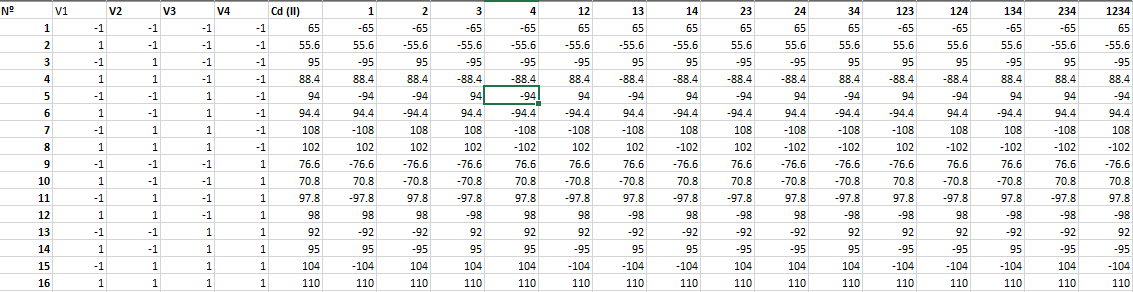\
 \
Após a leitura, a tabela sofre uma modificação através do método .iloc da biblioteca Pandas para selecionar somente o efeito das variáveis em seguido é realizado os cálculos de efeitos, quadrado dos efeitos e porcentagem de contribuição dos quadrados de efeitos em relação a soma.

In [53]:
leitura1 = pd.read_excel('efeitos.xlsm')
dados1 = leitura1.iloc[:,6:21]
dados1

,1,2,3,4,12,13,14,23,24,34,123,124,134,234,1234
0,-19.37000,-19.37000,-19.37000,-19.37000,19.37000,19.37000,19.37000,19.37000,19.37000,19.37000,-19.37000,-19.37000,-19.37000,-19.37000,19.37000
1,33.87000,-33.87000,-33.87000,-33.87000,-33.87000,-33.87000,-33.87000,33.87000,33.87000,33.87000,33.87000,33.87000,33.87000,-33.87000,-33.87000
2,-12.17000,12.17000,-12.17000,-12.17000,-12.17000,12.17000,12.17000,-12.17000,-12.17000,12.17000,12.17000,12.17000,-12.17000,12.17000,-12.17000
3,22.86000,22.86000,-22.86000,-22.86000,22.86000,-22.86000,-22.86000,-22.86000,-22.86000,22.86000,-22.86000,-22.86000,22.86000,22.86000,22.86000
4,-10.14000,-10.14000,10.14000,-10.14000,10.14000,-10.14000,10.14000,-10.14000,10.14000,-10.14000,10.14000,-10.14000,10.14000,10.14000,-10.14000
5,15.41000,-15.41000,15.41000,-15.41000,-15.41000,15.41000,-15.41000,-15.41000,15.41000,-15.41000,-15.41000,15.41000,-15.41000,15.41000,15.41000
6,-6.31000,6.31000,6.31000,-6.31000,-6.31000,-6.31000,6.31000,6.31000,-6.31000,-6.31000,-6.31000,6.31000,6.31000,-6.31000,6.31000
7,7.77000,7.77000,7.77000,-7.77000,7.77000,7.77000,-7.77000,7.77000,-7.77000,-7.77000,7.77000,-7.77000,-7.77000,-7.77000,-7.77000
8,-46.61000,-46.61000,-46.61000,46.61000,46.61000,46.61000,-46.61000,46.61000,-46.61000,-46.61000,-46.61000,46.61000,46.61000,46.61000,-46.61000
9,69.45000,-69.45000,-69.45000,69.45000,-69.45000,-69.45000,69.45000,69.45000,-69.45000,-69.45000,69.45000,-69.45000,-69.45000,69.45000,69.45000


## Cálculo de efeitos 

O cáculo de efeitos, neste caso, é dado pela diferença da média das respostas de nível alto e baixo, indicado pela pela equação 1.\
\
Equação 1. Efeito para as variáveis e interações. [3] \
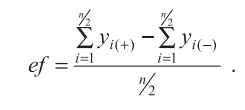


In [54]:
soma1=[]
for i in range(15):
    s = dados1.iloc[:,i]
    soma1.append(sum(s))
    somas1 = np.array(soma1)
efeitos1 = somas1/8
efeitor1 = []
for i in efeitos1:
  efeitor1.append(i)
efeitor1

[9.36984375,
 -13.926093750000003,
 -13.574531249999996,
 25.929843750000003,
 -4.0992187499999995,
 -4.5914062499999995,
 0.3923437500000004,
 5.82890625,
 -5.578593750000001,
 0.1054687500000035,
 2.9432812499999996,
 -1.9560937500000026,
 0.600468749999999,
 3.933281250000001,
 2.9432812500000014]

In [55]:
index= [1,2,3,4,12,13,14,23,24,34,123,124,134,234,1234]

In [56]:
efeito1 = pd.Series(efeitor1, index=index, name='Efeitos/Quadrado/Porcentagem')
efeito3 = efeito1.sort_values()
efeito3

2      -13.926094
3      -13.574531
24      -5.578594
13      -4.591406
12      -4.099219
124     -1.956094
34       0.105469
14       0.392344
134      0.600469
123      2.943281
1234     2.943281
234      3.933281
23       5.828906
1        9.369844
4       25.929844
Name: Efeitos/Quadrado/Porcentagem, dtype: float64

## Quadrado dos efeitos


É dado pelo quadrado dos efeitos de cada variável e interação, indicado pela Equação.\
\
Equação 2: Quadrados dos efeitos.\
\
**quadrado = (efeitos)²**

In [57]:
quadrado1 = efeito3**2
quadrado1

2       193.936087
3       184.267899
24       31.120708
13       21.081011
12       16.803594
124       3.826303
34        0.011124
14        0.153934
134       0.360563
123       8.662905
1234      8.662905
234      15.470701
23       33.976148
1        87.793972
4       672.356797
Name: Efeitos/Quadrado/Porcentagem, dtype: float64

## Porcentagem 

A porcentagem de contribuição de cada efeitos é calculado com a relação do quadrados dos efeitos com o somatório dos quadrados dos efeitos de cada variável e interação, indicado pela Equação 3.\
\
Equação 3. Porcentagem de contribuição de cada efeitos.\
\
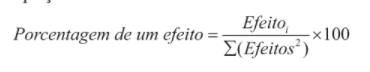

In [58]:
porcentagem1= quadrado1/sum(quadrado1)
porcentagem1

2       0.151692
3       0.144130
24      0.024342
13      0.016489
12      0.013143
124     0.002993
34      0.000009
14      0.000120
134     0.000282
123     0.006776
1234    0.006776
234     0.012101
23      0.026575
1       0.068670
4       0.525901
Name: Efeitos/Quadrado/Porcentagem, dtype: float64

## Início, fim, centro e z

In [59]:
#n_int = int(input('Qual o número de variáveis e interações?: '))
n_int = 15
fim = []
inicio = [0]
centro = []
gauss = []
inc = (1/(n_int))
for i in range(n_int):
   fim.append(inicio[i] + inc)
   inicio.append(fim[i])
   centro.append((inicio[i]+fim[i])/2)
   gauss.append(norm.ppf(centro))
z = []
for j in gauss[n_int-1]:
  z.append(j)
del inicio[n_int]

## Construção do dataframe com os resultados


In [60]:
index1 = efeito3.index

In [61]:
colunas1 = {'Efeitos R1' :efeito3 ,'Quadrado':quadrado1,'Porcentagem':porcentagem1,"Início":inicio,'Fim':fim,'Centro':centro,'Gaussiana':z}

In [62]:
gauss1 = pd.DataFrame(colunas1, index=index1)
gauss1 = gauss1.rename_axis('N°')
gauss1

,Efeitos R1,Quadrado,Porcentagem,Início,Fim,Centro,Gaussiana
N°,,,,,,,
2,-13.926094,193.936087,0.151692,0.000000,0.066667,0.033333,-1.833915
3,-13.574531,184.267899,0.144130,0.066667,0.133333,0.100000,-1.281552
24,-5.578594,31.120708,0.024342,0.133333,0.200000,0.166667,-0.967422
13,-4.591406,21.081011,0.016489,0.200000,0.266667,0.233333,-0.727913
12,-4.099219,16.803594,0.013143,0.266667,0.333333,0.300000,-0.524401
124,-1.956094,3.826303,0.002993,0.333333,0.400000,0.366667,-0.340695
34,0.105469,0.011124,0.000009,0.400000,0.466667,0.433333,-0.167894
14,0.392344,0.153934,0.000120,0.466667,0.533333,0.500000,0.000000
134,0.600469,0.360563,0.000282,0.533333,0.600000,0.566667,0.167894


## Gráficos 

In [63]:
sns.set_theme(style="darkgrid")

### Gráfico 1: Probabilidade (Efeito x z)

### Plot do gráfico 1 

In [64]:
markers=['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P']
len(markers)

15

In [65]:
def etiqueta(annotations): 
  for i,label in enumerate(annotations):
    plt.annotate(label, (list(gauss1.iloc[:,0])[i],list(gauss1.iloc[:,6])[i]))

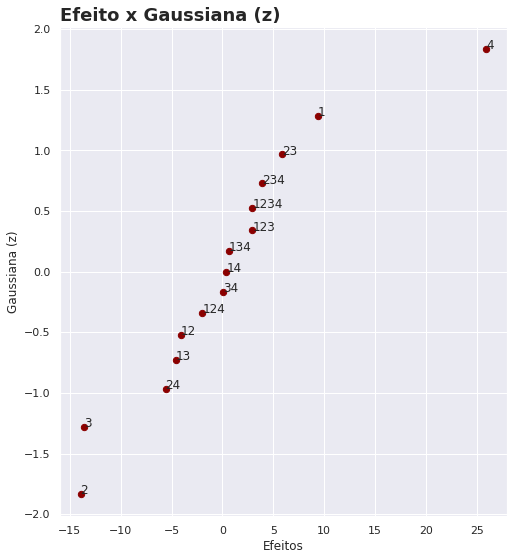

In [66]:
def grafico1():
    annotations = list(gauss1.index)
    plt.figure(figsize=(8,9))
    plt.scatter(list(gauss1.iloc[:,0]),list(gauss1.iloc[:,6]),s=40, color='darkred')
    plt.title('Efeito x Gaussiana (z)', fontsize=18, fontweight='black', loc='left')
    plt.ylabel('Gaussiana (z)')
    plt.xlabel('Efeitos')
    etiqueta(annotations)
grafico1()

### Gráfico 2: Porcentagem de efeito x Interações

### Selecionando dados do dataframe

In [67]:
x2= np.array(porcentagem1.index)
y2= porcentagem1.values

In [68]:
data2= pd.DataFrame({'Efeitos R1': x2, 'Porcentagem (%)': y2})
data2

,Efeitos R1,Porcentagem (%)
0,2,0.151692
1,3,0.144130
2,24,0.024342
3,13,0.016489
4,12,0.013143
5,124,0.002993
6,34,0.000009
7,14,0.000120
8,134,0.000282
9,123,0.006776


### Plot do gráfico 2

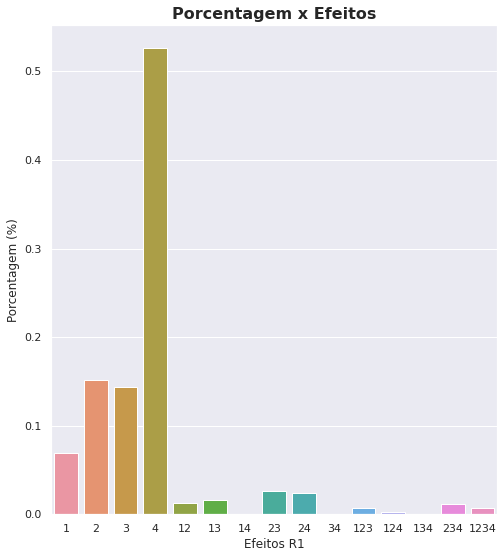

In [69]:
def grafico2():
    plt.figure(figsize=(8,9))
    tips = sns.load_dataset("tips")
    ax2 = sns.barplot(x='Efeitos R1', y='Porcentagem (%)', data=data2)
    ax2.set_title('Porcentagem x Efeitos', fontsize=16, fontweight='black')
    return ax2
grafico2()

# Reorganização do Planejamento 

## Variância e Erro de um Efeito

### Variância e Erro Experimental

#### Excluindo variáveis insignificantes   

In [70]:
V1 = leitura1['V1'][:16].values
V2 = leitura1['V2'][:16].values
V3 = leitura1['V3'][:16].values
V4 = leitura1['V4'][:16].values
R = leitura1['R'][:16].values

In [71]:
col = {'V1': V1, 'V2':V2, 'V3':V3, 'V4':V4, 'R': R}
exp = pd.Series(list(range(1,17)))
dados2 = pd.DataFrame(col, index=exp)
dados2

,V1,V2,V3,V4,R
1,-1.0,-1.0,-1.0,-1.0,19.37
2,1.0,-1.0,-1.0,-1.0,33.87
3,-1.0,1.0,-1.0,-1.0,12.17
4,1.0,1.0,-1.0,-1.0,22.86
5,-1.0,-1.0,1.0,-1.0,10.14
6,1.0,-1.0,1.0,-1.0,15.41
7,-1.0,1.0,1.0,-1.0,6.31
8,1.0,1.0,1.0,-1.0,7.77
9,-1.0,-1.0,-1.0,1.0,46.61
10,1.0,-1.0,-1.0,1.0,69.45


In [72]:
def coleta():
  x=0
  var_exp = []
  N=''
  while True:
    x+=1
    if x <= 4:
      var_insg = input(f'Digite a variável {x} insignificante?(V1, V2, V3 ou V4): ')
      N = str(input('Pressione qualquer tecla para continuar para inserir mais uma variável, caso contrário digite "N" para sair. ')).strip().upper()[0]
      var_exp.append(var_insg.upper())
    if N == "N":
      break
      exit()
    if x == 4:
      print('Todas variáveis são insignificantes.')
      break
      exit()
  return var_exp

In [73]:
dados2

,V1,V2,V3,V4,R
1,-1.0,-1.0,-1.0,-1.0,19.37
2,1.0,-1.0,-1.0,-1.0,33.87
3,-1.0,1.0,-1.0,-1.0,12.17
4,1.0,1.0,-1.0,-1.0,22.86
5,-1.0,-1.0,1.0,-1.0,10.14
6,1.0,-1.0,1.0,-1.0,15.41
7,-1.0,1.0,1.0,-1.0,6.31
8,1.0,1.0,1.0,-1.0,7.77
9,-1.0,-1.0,-1.0,1.0,46.61
10,1.0,-1.0,-1.0,1.0,69.45


In [74]:
def tabela_nova1(dados2):
  dados2 = dados2.drop(cond[0], axis='columns')
  a1 = dados2[dados2.T.index[0]].values
  a2 = dados2[dados2.T.index[1]].values
  a3 = dados2[dados2.T.index[2]].values
  a1a2 = a1*a2
  a1a3 = a1*a3
  a2a3 = a2*a3
  dados2.insert(3, f"{dados2.T.index[0]}{dados2.T.index[1]}", a1a2, allow_duplicates=False)
  dados2.insert(4, f"{dados2.T.index[0]}{dados2.T.index[2]}", a1a3, allow_duplicates=False)
  dados2.insert(5, f"{dados2.T.index[1]}{dados2.T.index[2]}", a2a3, allow_duplicates=False)
  dados3 = dados2.sort_values([f'{dados2.T.index[0]}', f'{dados2.T.index[1]}', f'{dados2.T.index[2]}'], ascending=True)
  return dados3
def tabela_nova2(dados2):
  dados2 = dados2.drop(cond[0], axis='columns')
  dados2 = dados2.drop(cond[1], axis='columns')
  a1 = dados2[dados2.T.index[0]].values
  a2 = dados2[dados2.T.index[1]].values
  a1a2 = a1*a2
  dados3 = dados2.insert(2, f"{dados2.T.index[0]}{dados2.T.index[1]}", a1a2, allow_duplicates=False)
  dados3 = dados2.sort_values([f'{dados2.T.index[0]}',f'{dados2.T.index[1]}'], ascending=True)
  return dados3
def tabela_nova3(dados2):
  dados2 = dados2.drop(cond[0], axis='columns')
  dados2 = dados2.drop(cond[1], axis='columns')
  dados2 = dados2.drop(cond[2], axis='columns')
  a1 = dados2[dados2.T.index[0]].values
  dados3 = dados2.sort_values([f'{dados2.T.index[0]}'], ascending=True)
  return dados3

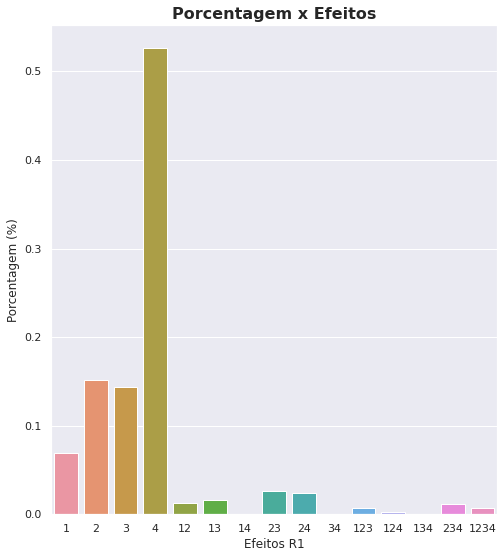

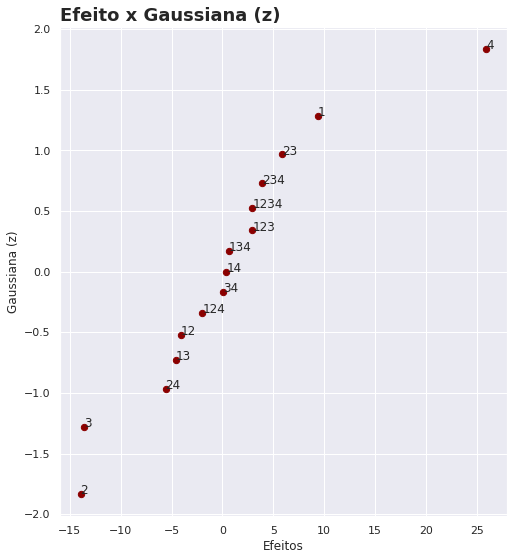

In [75]:
grafico2()
grafico1()

In [76]:
cond = coleta()
if len(cond) == 1:
  dados3 = tabela_nova1(dados2)
  R2 = []
  for i in range(1,17,2):
    R2.append(dados3['R'].iloc[i])
  replicas = dados3.iloc[:,0:-1]
  replicas = replicas.drop_duplicates()
  replicas['R1'] = dados3['R']
  replicas['R2'] = R2
if len(cond) == 2:
  dados3 = tabela_nova2(dados2)
  R=[]
  R2=[]
  R3=[]
  R4=[]
  for i in range(0,16,4):
    R.append(dados3.iloc[i,-1])
  for i in range(1,16,4):
    R2.append(dados3.iloc[i,-1])
  for i in range(2,16,4):
    R3.append(dados3.iloc[i,-1])
  for i in range(3,16,4):
    R4.append(dados3.iloc[i,-1])
  replicas = dados3.iloc[:,0:-1]
  replicas = replicas.drop_duplicates()
  replicas['R1'] = R
  replicas['R2'] = R2
  replicas['R3'] = R3
  replicas['R4'] = R4
if len(cond) == 3:
  dados3 = tabela_nova3(dados2)
  R=[]
  R2=[]
  R3=[]
  R4=[]
  R5=[]
  R6=[]
  R7=[]
  R8=[]
  for i in range(0,16,8):
    R.append(dados3.iloc[i,-1])
  for i in range(1,16,8):
    R2.append(dados3.iloc[i,-1])
  for i in range(2,16,8):
    R3.append(dados3.iloc[i,-1])
  for i in range(3,16,8):
    R4.append(dados3.iloc[i,-1])
  for i in range(4,16,8):
    R5.append(dados3.iloc[i,-1])
  for i in range(5,16,8):
    R6.append(dados3.iloc[i,-1])
  for i in range(6,16,8):
    R7.append(dados3.iloc[i,-1])
  for i in range(7,16,8):
    R8.append(dados3.iloc[i,-1])
  replicas = dados3.iloc[:,0:-1]
  replicas = replicas.drop_duplicates()
  replicas['R1'] = R
  replicas['R2'] = R2
  replicas['R3'] = R3
  replicas['R4'] = R4
  replicas['R5'] = R5
  replicas['R6'] = R6
  replicas['R7'] = R7
  replicas['R8'] = R8
if len(cond) == 4:
  print('Todas variáveis são insignificantes.')

Digite a variável 1 insignificante?(V1, V2, V3 ou V4): v1
Pressione qualquer tecla para continuar para inserir mais uma variável, caso contrário digite "N" para sair. n


#### Selecionando replicatas 

#### Construindo tabela de réplicas

### Adicione Tabela de Réplicas Combinada Aqui
Caso contenha mais de uma replicata realize as seguintes instruções:
- Rode o programa o para cada réplica, utilzando os macros do excel para cada réplica. 
- Retire o comentário da célula abaixo "#"
- Depois, pelo Excel, calcule a média das réplicas e monte uma tabela no formato exatamente igual ao apresentado pelo DataFrame aqui acima com o nome *'replicas'*.

In [77]:
#replicas = pd.read_excel('replicas.xlsx')
#cond=4

#### Média das Réplicas 


In [78]:
if len(cond) == 1:
  dados_media = replicas.iloc[:,6:8].T.mean()
  replicas['Média'] = dados_media 
if len(cond) == 2:
  mr1 = list(replicas.iloc[:1,3:].T.mean().values)
  mr2 = replicas.iloc[1:2,3:].T.mean().values
  mr3 = replicas.iloc[2:3,3:].T.mean().values
  mr4 = replicas.iloc[3:4,3:].T.mean().values
  mean = [mr1,mr2,mr3,mr4]
  mean_r =[]
  for i in mean:
    for j in i:
      mean_r.append(j)
  mean_r
  replicas['Média'] = mean_r
  replicas
if len(cond) == 3:
  dados_media = replicas.iloc[:,1:9].T.mean()
  replicas['Média'] = dados_media 

In [79]:
replicas

,V2,V3,V4,V2V3,V2V4,V3V4,R1,R2,Média
1,-1.0,-1.0,-1.0,1.0,1.0,1.0,19.37,33.87,26.620
9,-1.0,-1.0,1.0,1.0,-1.0,-1.0,46.61,69.45,58.030
5,-1.0,1.0,-1.0,-1.0,1.0,-1.0,10.14,15.41,12.775
13,-1.0,1.0,1.0,-1.0,-1.0,1.0,34.74,40.02,37.380
3,1.0,-1.0,-1.0,-1.0,-1.0,1.0,12.17,22.86,17.515
11,1.0,-1.0,1.0,-1.0,1.0,-1.0,31.21,32.82,32.015
7,1.0,1.0,-1.0,1.0,-1.0,-1.0,6.31,7.77,7.040
15,1.0,1.0,1.0,1.0,1.0,1.0,26.23,31.21,28.720


#### Variância das réplicas

In [80]:
if len(cond) == 1:
  for i in range(replicas.shape[0]):
    dados_var = replicas.iloc[:,6:8].T.var()
  replicas['Variância'] = dados_var
if len(cond) == 2:
  var_r = []
  for i  in range(1,5):
    var = replicas.iloc[i-1:i,3:7]
    var = var.T.var(axis=0).values
    var_r.append(var[0])
  replicas['Variância'] = var_r
if len(cond) == 3:
  for i in range(replicas.shape[0]):
    dados_var = replicas.iloc[:,1:9].T.var()
    replicas['Variância'] = dados_var
replicas

,V2,V3,V4,V2V3,V2V4,V3V4,R1,R2,Média,Variância
1,-1.0,-1.0,-1.0,1.0,1.0,1.0,19.37,33.87,26.620,105.12500
9,-1.0,-1.0,1.0,1.0,-1.0,-1.0,46.61,69.45,58.030,260.83280
5,-1.0,1.0,-1.0,-1.0,1.0,-1.0,10.14,15.41,12.775,13.88645
13,-1.0,1.0,1.0,-1.0,-1.0,1.0,34.74,40.02,37.380,13.93920
3,1.0,-1.0,-1.0,-1.0,-1.0,1.0,12.17,22.86,17.515,57.13805
11,1.0,-1.0,1.0,-1.0,1.0,-1.0,31.21,32.82,32.015,1.29605
7,1.0,1.0,-1.0,1.0,-1.0,-1.0,6.31,7.77,7.040,1.06580
15,1.0,1.0,1.0,1.0,1.0,1.0,26.23,31.21,28.720,12.40020


#### Número de experimentos e graus de liberdade

In [81]:
if len(cond) == 1:
  n0 = 2
  gl0 = n0 - 1
  n = []
  gl = []
  for i in range(replicas.shape[0]):
    n.append(n0)
    gl.append(gl0)
  replicas['Nº exp'] = n
  replicas['g.l'] = gl
if len(cond) == 2:
  n0 = 4
  gl0 = n0 - 1
  n = []
  gl = []
  for i in range(4):
    n.append(n0)
    gl.append(gl0)
  replicas['Nº exp'] = n
  replicas['g.l'] = gl
if len(cond) == 3:
  n0 = 8
  gl0 = n0 - 1
  n = []
  gl = []
  for i in range(replicas.shape[0]):
    n.append(n0)
    gl.append(gl0)
  replicas['Nº exp'] = n
  replicas['g.l'] = gl

In [82]:
replicas

,V2,V3,V4,V2V3,V2V4,V3V4,R1,R2,Média,Variância,Nº exp,g.l
1,-1.0,-1.0,-1.0,1.0,1.0,1.0,19.37,33.87,26.620,105.12500,2,1
9,-1.0,-1.0,1.0,1.0,-1.0,-1.0,46.61,69.45,58.030,260.83280,2,1
5,-1.0,1.0,-1.0,-1.0,1.0,-1.0,10.14,15.41,12.775,13.88645,2,1
13,-1.0,1.0,1.0,-1.0,-1.0,1.0,34.74,40.02,37.380,13.93920,2,1
3,1.0,-1.0,-1.0,-1.0,-1.0,1.0,12.17,22.86,17.515,57.13805,2,1
11,1.0,-1.0,1.0,-1.0,1.0,-1.0,31.21,32.82,32.015,1.29605,2,1
7,1.0,1.0,-1.0,1.0,-1.0,-1.0,6.31,7.77,7.040,1.06580,2,1
15,1.0,1.0,1.0,1.0,1.0,1.0,26.23,31.21,28.720,12.40020,2,1


#### Variância e Erro experimental 

In [83]:
var_exp = replicas['Variância'].mean()
erro_exp = (var_exp)**(0.5)
print(f"Variância experimental igual a {var_exp} e Erro experimental igual {erro_exp}")
replicas['Var_exp'] = var_exp
replicas['Erro_exp'] = erro_exp
replicas

Variância experimental igual a 58.21044375 e Erro experimental igual 7.629576905045259


,V2,V3,V4,V2V3,V2V4,V3V4,R1,R2,Média,Variância,Nº exp,g.l,Var_exp,Erro_exp
1,-1.0,-1.0,-1.0,1.0,1.0,1.0,19.37,33.87,26.620,105.12500,2,1,58.210444,7.629577
9,-1.0,-1.0,1.0,1.0,-1.0,-1.0,46.61,69.45,58.030,260.83280,2,1,58.210444,7.629577
5,-1.0,1.0,-1.0,-1.0,1.0,-1.0,10.14,15.41,12.775,13.88645,2,1,58.210444,7.629577
13,-1.0,1.0,1.0,-1.0,-1.0,1.0,34.74,40.02,37.380,13.93920,2,1,58.210444,7.629577
3,1.0,-1.0,-1.0,-1.0,-1.0,1.0,12.17,22.86,17.515,57.13805,2,1,58.210444,7.629577
11,1.0,-1.0,1.0,-1.0,1.0,-1.0,31.21,32.82,32.015,1.29605,2,1,58.210444,7.629577
7,1.0,1.0,-1.0,1.0,-1.0,-1.0,6.31,7.77,7.040,1.06580,2,1,58.210444,7.629577
15,1.0,1.0,1.0,1.0,1.0,1.0,26.23,31.21,28.720,12.40020,2,1,58.210444,7.629577


### Variância e Erro do Efeito

#### Erro de um efeito

In [84]:
k = 4-len(cond)
erro_eft = (2*erro_exp)/((n0*(2**k))**(0.5))
replicas['Erro_eft'] = erro_eft
print(f'Erro de um Efeito: {erro_eft}')

Erro de um Efeito: 3.8147884525226297


#### Variância de um efeito

In [85]:
a = replicas[replicas.T.index[2]].values
a2 = a**2
sum_a = np.sum(a2)/replicas.shape[0]
var_eft = sum_a*(var_exp/replicas.shape[0])
replicas['Var_eft'] = var_eft

In [86]:
replicas

,V2,V3,V4,V2V3,V2V4,V3V4,R1,R2,Média,Variância,Nº exp,g.l,Var_exp,Erro_exp,Erro_eft,Var_eft
1,-1.0,-1.0,-1.0,1.0,1.0,1.0,19.37,33.87,26.620,105.12500,2,1,58.210444,7.629577,3.814788,7.276305
9,-1.0,-1.0,1.0,1.0,-1.0,-1.0,46.61,69.45,58.030,260.83280,2,1,58.210444,7.629577,3.814788,7.276305
5,-1.0,1.0,-1.0,-1.0,1.0,-1.0,10.14,15.41,12.775,13.88645,2,1,58.210444,7.629577,3.814788,7.276305
13,-1.0,1.0,1.0,-1.0,-1.0,1.0,34.74,40.02,37.380,13.93920,2,1,58.210444,7.629577,3.814788,7.276305
3,1.0,-1.0,-1.0,-1.0,-1.0,1.0,12.17,22.86,17.515,57.13805,2,1,58.210444,7.629577,3.814788,7.276305
11,1.0,-1.0,1.0,-1.0,1.0,-1.0,31.21,32.82,32.015,1.29605,2,1,58.210444,7.629577,3.814788,7.276305
7,1.0,1.0,-1.0,1.0,-1.0,-1.0,6.31,7.77,7.040,1.06580,2,1,58.210444,7.629577,3.814788,7.276305
15,1.0,1.0,1.0,1.0,1.0,1.0,26.23,31.21,28.720,12.40020,2,1,58.210444,7.629577,3.814788,7.276305


### Valor de "t
Em planejamento fatorial é aplicado 95% de confiança geralmente.

In [87]:
# sig = int(input('Digite o nível de significância?(%): '))
sig = 95
valor_t = (stats.t.ppf((1-(sig/100))/2, sum(replicas['g.l'])))*(-1)
#print(f'Valor de "t": {valor_t}')
replicas['t-value'] = valor_t

### Selecionados dados médios


In [88]:
if len(cond) == 1:
  media =  replicas[f'{replicas.T.index[8]}'].values
  col_vmedio = {f'{replicas.T.index[0]}': replicas[f'{replicas.T.index[0]}'],
                f'{replicas.T.index[1]}': replicas[f'{replicas.T.index[1]}'],
                f'{replicas.T.index[2]}': replicas[f'{replicas.T.index[2]}'],
                f'{replicas.T.index[3]}': replicas[f'{replicas.T.index[3]}'],
                f'{replicas.T.index[4]}': replicas[f'{replicas.T.index[4]}'],
                f'{replicas.T.index[5]}': replicas[f'{replicas.T.index[5]}'],}
  v_medio = pd.DataFrame(col_vmedio, index = replicas.index)
  eft_medios = []
  for i in range(v_medio.shape[0]):
    efeito = list(v_medio.loc[list(v_medio.index)[i]].values*media[i])
    eft_medios.append(efeito)
  col_vmedio = {f'{v_medio.index.values[0]}':eft_medios[0],
  f'{v_medio.index.values[1]}':eft_medios[1],
  f'{v_medio.index.values[2]}':eft_medios[2],
  f'{v_medio.index.values[3]}':eft_medios[3],
  f'{v_medio.index.values[4]}':eft_medios[4],
  f'{v_medio.index.values[5]}':eft_medios[5],
  f'{v_medio.index.values[6]}':eft_medios[6],
  f'{v_medio.index.values[7]}':eft_medios[7]}
  eft_replicas = pd.DataFrame(col_vmedio, index=v_medio.T.index)
  eft_replicas = eft_replicas.T
if len(cond) == 2:
  #n_replicas = int(input('Qual o número de réplicas na nova tabela? '))
  v_medias = replicas.iloc[:,:3] #ALTERAR
  v_medias['Médias'] = replicas['Média']
  v1 = [] 
  v2 = []
  v1v2 = [] 
  for i in range(4):
    x = v_medias['Médias'].values[i]
    v1.append(v_medias[v_medias.T.index[0]].values[i]*(x))
    v2.append(v_medias[v_medias.T.index[1]].values[i]*(x))
    v1v2.append(v_medias[v_medias.T.index[0]].values[i]*(x))
  col_vmedio = {f'{v_medias.T.index[0]}':v1, f'{v_medias.T.index[1]}':v2,f'{v_medias.T.index[0]}{v_medias.T.index[1]}':v1v2}
  eft_replicas = pd.DataFrame(col_vmedio, index=v_medias.index)
  eft_replicas
  #val_medio.to_excel('x.xlsx') #doc_teste
if len(cond) == 3:
  media =  replicas[f'{replicas.T.index[9]}'].values
  col_vmedio = {f'{replicas.T.index[0]}': replicas[f'{replicas.T.index[0]}'],'Média':media}
  v_medio = pd.DataFrame(col_vmedio, index = replicas.index)
  eft_medios = []
  for i in range(v_medio.shape[0]):
    efeito = v_medio[v_medio.T.index[0]].values[i]*v_medio[v_medio.T.index[1]].values[i]
    eft_medios.append(efeito)
  col_vmedio = {f'{v_medio.T.index[0]}': eft_medios}
  eft_replicas = pd.DataFrame(col_vmedio, index=v_medio.index)
eft_replicas

,V2,V3,V4,V2V3,V2V4,V3V4
1,-26.620,-26.620,-26.620,26.620,26.620,26.620
9,-58.030,-58.030,58.030,58.030,-58.030,-58.030
5,-12.775,12.775,-12.775,-12.775,12.775,-12.775
13,-37.380,37.380,37.380,-37.380,-37.380,37.380
3,17.515,-17.515,-17.515,-17.515,-17.515,17.515
11,32.015,-32.015,32.015,-32.015,32.015,-32.015
7,7.040,7.040,-7.040,7.040,-7.040,-7.040
15,28.720,28.720,28.720,28.720,28.720,28.720


### Cálculo de efeitos, quadrado, porcentagem e gaussiana médios

#### Efeitos

In [104]:
if len(cond) == 1:
  efeitor2 = eft_replicas.sum().values/8
if len(cond) == 2:
  efeitor2=[]
  for i in range(3):
    efeitor2.append(eft_replicas.T.values[i].sum()/8)
efeitor2
if len(cond) == 3:
  efeitor2=[]
  for i in range(1):
    efeitor2.append(val_medio.T.values[i].sum()/8)
index_eft = eft_replicas.T.index
efeitos_replicas = pd.DataFrame({'Efeitos':efeitor2}, index=index_eft)  # Utilizar esta variável no dataframe de efeitos e gaussiana 
efeitos_replicas = efeitos_replicas.sort_values(by=['Efeitos'])
efeitos_replicas.values.T[0]

array([-6.189375, -6.033125, -2.479375,  0.046875,  2.590625, 11.524375])

#### Quadrado e porcentagem

In [101]:
efeitor4 = efeitos_replicas.values.T[0]
qdr_medio = efeitor4**2
por_medio = qdr_medio/np.sum(qdr_medio)
qdr_medio = np.sort(qdr_medio)
por_medio = np.sort(por_medio)

In [102]:
qdr_medio

array([2.19726562e-03, 6.14730039e+00, 6.71133789e+00, 3.63985973e+01,
       3.83083629e+01, 1.32811219e+02])

#### Início, Fim, Centro e z (tabela de replicatas)

In [91]:
if len(cond) == 1:
  n_int1 = 6
  inicio1 = [0]
  fim1 = []
  centro1 = []
  z0 = []
  inc1 = (1/(n_int1))
  for i in range(n_int1):  
    fim1.append(inicio1[i] + inc1)
    inicio1.append(fim1[i])
    centro1.append((inicio1[i]+fim1[i])/2)
    z0.append(norm.ppf(centro1))
  z0 = z0[n_int1-1] 
  z1 = []
  for j in z0:
    z1.append(j)
  del inicio1[n_int1]
if len(cond) == 2:  
  #n_int1 = int(input('Qual o número de variáveis e interações?: '))
  n_int1 = 3
  inicio1 = [0]
  fim1 = []
  centro1 = []
  z0 = []
  inc1 = (1/(n_int1))
  for i in range(n_int1):  
    fim1.append(inicio1[i] + inc1)
    inicio1.append(fim1[i])
    centro1.append((inicio1[i]+fim1[i])/2)
    z0.append(norm.ppf(centro1))
  z0 = z0[n_int1-1] 
  z1 = []
  for j in z0:
    z1.append(j)
  del inicio1[n_int1]
  if len(cond) == 3:
    n_int1 = 1
    inicio1 = [0]
    fim1 = []
    centro1 = []
    z0 = []
    inc1 = (1/(n_int1))
    for i in range(n_int1):  
      fim1.append(inicio1[i] + inc1)
      inicio1.append(fim1[i])
      centro1.append((inicio1[i]+fim1[i])/2)
      z0.append(norm.ppf(centro1))
    z0 = z0[n_int1-1] 
    z1 = []
  if cond == 4:
    n_int1 = int(input('Qual o número de experimentos?(%): '))
    inicio1 = [0]
    fim1 = []
    centro1 = []
    z0 = []
    inc1 = (1/(n_int1))
    for i in range(n_int1):  
      fim1.append(inicio1[i] + inc1)
      inicio1.append(fim1[i])
      centro1.append((inicio1[i]+fim1[i])/2)
      z0.append(norm.ppf(centro1))
    z0 = z0[n_int1-1] 
    z1 = []

In [92]:
if len(cond) == 1:
  index_r = list(efeitos_replicas.index)
  colunas2 = {'Efeitos':efeitor4, 'Quadrado': qdr_medio, 'Porcentagem': por_medio, 'Início': inicio1,'Fim':fim1, 'Centro':centro1, 'Gaussiana':z1}
  gauss2 = pd.DataFrame(colunas2, index=index_r)
if len(cond) == 2:  
  index_r = []
  for i in range(3):
    index_r.append(val_medio.T.index[i])
  colunas2 = {'Efeitos':efeitor2, 'Quadrado': qdr_medio, 'Porcentagem': por_medio, 'Início': inicio1,'Fim':fim1, 'Centro':centro1, 'Gaussiana':z1}
  gauss2 = pd.DataFrame(colunas2, index=index_r)
if len(cond) == 3:  
  index_r = []
  index_r.append(efeitor2.index)
  colunas2 = {'Efeitos':efeitor2, 'Quadrado': qdr_medio, 'Porcentagem': por_medio, 'Início': inicio1,'Fim':fim1, 'Centro':centro1, 'Gaussiana':z1}
  gauss2 = pd.DataFrame(colunas2, index=index_r)
gauss2
if cond == 4:
  index_r = []
  index_r.append(efeitor2.index)
  colunas2 = {'Efeitos':efeitor2, 'Quadrado': qdr_medio, 'Porcentagem': por_medio, 'Início': inicio1,'Fim':fim1, 'Centro':centro1, 'Gaussiana':z1}
  gauss2 = pd.DataFrame(colunas2, index=index_r)
  gauss2

Exception: ignored

## Intervalo de Confiança

In [ ]:
confianca = (gl[0])**(0.5)*valor_t
inter_c = [-confianca,0,confianca]
gauss2['|Inter Confiança|'] = inter_c[2]
gauss2

## Gráficos - Envolvendo intervalo de confiança

### Gráfico de Probabilidade Replicatas

In [ ]:
def etiquetar1(annotationsr1): 
  for i,label in enumerate(annotationsr1):
    plt.annotate(label, (list(gauss2['Efeitos'])[i],list(gauss2['Gaussiana'])[i]))
gauss2

In [ ]:
#Eixo X intervalor de confiança 
c1 = []
c2 = []
c3 = []
for _ in range(gauss2.shape[0]):
  c1.append(inter_c[0])
  c2.append(inter_c[1])
  c3.append(inter_c[2])
c2

In [ ]:
def graficor1():
    annotationsr1 = list(gauss2.index)
    plt.figure(figsize=(8,9))
    ax3 = plt.scatter(list(gauss2['Efeitos']),list(gauss2['Gaussiana']),s=40, color='darkred')
    plt.title('Efeito x Gaussiana (z) - Replicatas', fontsize=18, fontweight='black', loc='left')
    plt.ylabel('Gaussiana (z)')
    plt.xlabel('Efeitos')
    etiquetar1(annotationsr1)
    plt.plot(c1,list(gauss2['Gaussiana']))
    plt.plot(c2,list(gauss2['Gaussiana']), color='darkred')
    plt.plot(c3,list(gauss2['Gaussiana']), color= 'black')
    return ax3
graficor1()

## Gráfico da contribuição de cada efeito

In [ ]:
eft_replicas = pd.DataFrame({'Efeitos':gauss2.index, 'Porcentagem (%)':gauss2['Porcentagem']}, index=gauss2.index)
def graficor2():
    plt.figure(figsize=(8,9))
    tips = sns.load_dataset("tips")
    ax4 = sns.barplot(x='Efeitos', y='Porcentagem (%)', data=eft_replicas)
    ax4.set_title('Porcentagem x Efeitos', fontsize=16, fontweight='black')
    return ax4
graficor2()

# Resultados finais - Planejamento Fatorial Completo

### Gráfico de probabilidade com intervalo de confiança.

In [ ]:
def salvar():
    writer = pd.ExcelWriter('resultadosfinaisreplicas.xlsx')
    gauss1.to_excel(writer, 'Efeitos-Porcemtagem-Gauss.xlsx')
    gauss2.to_excel(writer, sheet_name='Resultados Replicas')
    replicas.to_excel(writer, sheet_name='replicas.xlsx')
    writer.save()
salvar()

In [ ]:
def save_grafico():
    grafico1()
    plt.savefig('Probabilidade.pdf', format='pdf')
    grafico2()
    plt.savefig('Efeito.pdf', format='pdf')
    graficor1()
    plt.savefig('ProbabilidadeReplicatas.pdf', format='pdf')
    graficor2()
    plt.savefig('EfeitoReplicatas.pdf', format='pdf')
save_grafico()

**CAPÍTULO 2: PLANEJAMENTO FATORIAL FRACIONÁRIO**

**CAPÍTULO 3: CONSTRUÇÃO DE MODELOS DE REGRESSÃO**

# RASCUNHOS

In [ ]:
'''if len(cond) == 1:
  var_exp = replicas['Variância'].mean()
  erro_exp = (var_exp)**(0.5)
  print(f"Variância experimental igual a {var_exp} e Erro experimental igual {erro_exp}")
  replicas['Var_exp'] = var_exp
  replicas['Erro_exp'] = erro_exp
  replicas
if len(cond) == 2:
  var_exp = replicas['Variância'].mean()
  erro_exp = (var_exp)**(0.5)
  print(f"Variância experimental igual a {var_exp} e Erro experimental igual {erro_exp}")
  replicas['Var_exp'] = var_exp
  replicas['Erro_exp'] = erro_exp
  replicas'''

In [ ]:
# RASCUNHO DO CÓDIGO (EXCLUINDO VARIÁVEIS INSIGNIFICANTES)
'''dados2 = dados1.iloc[:,1:6]
dados2['V1'][0]
abc = pd.DataFrame({'A':a,'B':b,'C':c})
var_ex_1 = str(input('Digite a primeira variável insignificante?(V1, V2, V3 ou V4): ')).upper()
var_ex_2 = str(input('Digite a primeira variável insignificante?(V1, V2, V3 ou V4): ')).upper()
A=[1,2,3,4]
B=list(range(5,9))
C=list(range(9,13))
abc = abc.drop(var_ex_1, axis='columns')
abc = abc.drop(var_ex_2, axis='columns')'''

In [ ]:
'''a1 = replicas[replicas.T.index[0]].values
a2 = replicas[replicas.T.index[1]].values
a1a2 = a1*a2
replicas[f'{replicas.T.index[0]}{replicas.T.index[1]}'] = a1a2
replicas'''

In [ ]:
a'''var_ex_1 = str(input('Digite a primeira variável insignificante?(V1, V2, V3 ou V4): ')).upper()
var_ex_2 = str(input('Digite a segunda variável insignificante?(V1, V2, V3 ou V4): ')).upper()
if var_ex_1==var_ex_2:
  print("Erro: Digite duas variáveis diferentes.")
dados2 = dados2.drop(var_ex_1, axis='columns')
dados2 = dados2.drop(var_ex_2, axis='columns')
#dados2 = dados2.iloc[:,:3]
a1 = dados2[dados2.T.index[0]].values
a2 = dados2[dados2.T.index[1]].values
a1a2 = a1*a2
dados3 = dados2.insert(2, f"{dados2.T.index[0]}{dados2.T.index[1]}", a1a2, allow_duplicates=False)
dados3 = dados2.sort_values([f'{dados2.T.index[0]}',f'{dados2.T.index[1]}'], ascending=True)
#dados3 = dados2.sort_values(f'{dados2.T.index[1]}', ascending=True)'''

In [ ]:
'''def call_var1(dados3):
  s1 = dados3.iloc[:1]
  s2 = dados3.iloc[8:9]
  r0 = list(dados3['R'].iloc[1:8].values)
  r1 = list(dados3['R'].iloc[9:16].values)
  for i in range(7):
    s1.loc[:, f'R{i+2}'] = r0[i]
    s2.loc[:, f'R{i+2}'] = r1[i]
def call_var2(dados3):
  s1 = dados3.iloc[:1]
  s2 = dados3.iloc[4:5]
  s3 = dados3.iloc[8:9]
  s4 = dados3.iloc[12:13]
  r0 = list(dados3['R'].iloc[1:4].values)
  r1 = list(dados3['R'].iloc[5:8].values)
  r2 = list(dados3['R'].iloc[9:12].values)
  r3 = list(dados3['R'].iloc[13:16].values)
  for i in range(3):
    s1.loc[:, f'R{i+2}'] = r0[i]
    s2.loc[:, f'R{i+2}'] = r1[i]
    s3.loc[:, f'R{i+2}'] = r2[i]
    s4.loc[:, f'R{i+2}'] = r3[i]
def call_var3(dados3):
  s1 = dados3.iloc[:1]
  s2 = dados3.iloc[2:3]
  s3 = dados3.iloc[4:5]
  s4 = dados3.iloc[6:7]
  s5 = dados3.iloc[8:9]
  s6 = dados3.iloc[10:11]
  s7 = dados3.iloc[12:13]
  s8 = dados3.iloc[14:15]
  r0 = list(dados3['R'].iloc[1:2].values)
  r1 = list(dados3['R'].iloc[3:4].values)
  r2 = list(dados3['R'].iloc[5:6].values)
  r3 = list(dados3['R'].iloc[7:8].values)
  r4 = list(dados3['R'].iloc[9:10].values)
  r5 = list(dados3['R'].iloc[11:12].values)
  r6 = list(dados3['R'].iloc[13:14].values)
  r7 = list(dados3['R'].iloc[15:16].values)
  rt = [r0, r1, r2, r3, r4, r5, r6, r7]
  st = [s1, s2, s3, s4, s5, s6, s7, s8]
  for i in rt:
    for j in i:
      rtotal.append(j)
  for j in range(len(rt)):
    for i in range(1):
      s1[f'R{i+2}'] = rtotal[i]
      s2[f'R{i+2}'] = rtotal[i]
      s3[f'R{i+2}'] = rtotal[i]
      s4[f'R{i+2}'] = rtotal[i]
      s5[f'R{i+2}'] = rtotal[i]
      s6[f'R{i+2}'] = rtotal[i]
      s7[f'R{i+2}'] = rtotal[i]
      s8[f'R{i+2}'] = rtotal[i]
  return rt, st'''

In [ ]:
'''if dados3.shape[1] == 4:
  index = [dados3.iloc[0:4].index, dados3.iloc[4:8].index, dados3.iloc[8:12].index, dados3.iloc[12:16].index]
  replicas = pd.DataFrame(columns = [f'{dados2.T.index[0]}', f'{dados2.T.index[1]}',f'{dados2.T.index[0]}{dados2.T.index[1]}',	'R1',	'R2',	'R3', 'R4'], index=index)
  replicas.iloc[:1,:] = list(s1.values)
  replicas.iloc[1:2,:] = list(s2.values)
  replicas.iloc[2:3,:] = list(s3.values)
  replicas.iloc[3:4,:] = list(s4.values)
  replicas.to_excel('replicas.xlsx')'''

In [ ]:
'''if len(cond) == 1:
  k = 4-len(cond)
  erro_eft = (2*erro_exp)/((n0*(2**k))**(0.5))
  replicas['Erro_eft'] = erro_eft
  print(f'Erro de um Efeito: {erro_eft}')
if len(cond) == 2:
  k = 4-len(cond)
  erro_eft = (2*erro_exp)/((n0*(2**k))**(0.5))
  replicas['Erro_eft'] = erro_eft
  print(f'Erro de um Efeito: {erro_eft}')'''

In [ ]:
'''if len(cond) == 1:
  a = replicas[replicas.T.index[2]].values
  a2 = a**2
  sum_a = np.sum(a2)/replicas.shape[0]
  var_eft = sum_a*(var_exp/replicas.shape[0])
  replicas['Var_eft'] = var_eft
if len(cond) == 2:
  a = replicas[replicas.T.index[2]].values
  a2 = a**2
  sum_a = np.sum(a2)/replicas.shape[0]
  var_eft = sum_a*(var_exp/replicas.shape[0])
  replicas['Var_eft'] = var_eft'''